# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=187a3a18ad2318a1a72d5a39b266908f"
city = "London"

#Build query URL
query_url = url + "&q=" + city

print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=187a3a18ad2318a1a72d5a39b266908f&q=London


In [39]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

#Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.25, 'feels_like': 39.83, 'temp_min': 48.2, 'temp_max': 52, 'pressure': 1015, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1580728760, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1580715407, 'sunset': 1580748702}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=187a3a18ad2318a1a72d5a39b266908f"
#units = "metric"

#Build query url
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [53]:
Citi_weatherDF = weather_json
Citi_weatherDF

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 50.25,
  'feels_like': 39.83,
  'temp_min': 48.2,
  'temp_max': 52,
  'pressure': 1015,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 14.99, 'deg': 250},
 'clouds': {'all': 75},
 'dt': 1580728760,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1580715407,
  'sunset': 1580748702},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
cities_pd = pd.read_csv("../output_data/cities.csv")
cities_pd.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
cities_pd_LVT= cities_pd.iloc[:,[6,8]]
cities_pd_LVT

,Lat,Max Temp
0,68.05,37.50
1,-20.41,78.80
2,77.48,22.20
3,40.71,44.60
4,-33.93,55.99
...,...,...
543,33.97,80.60
544,24.01,84.20
545,49.65,61.00
546,51.07,49.74


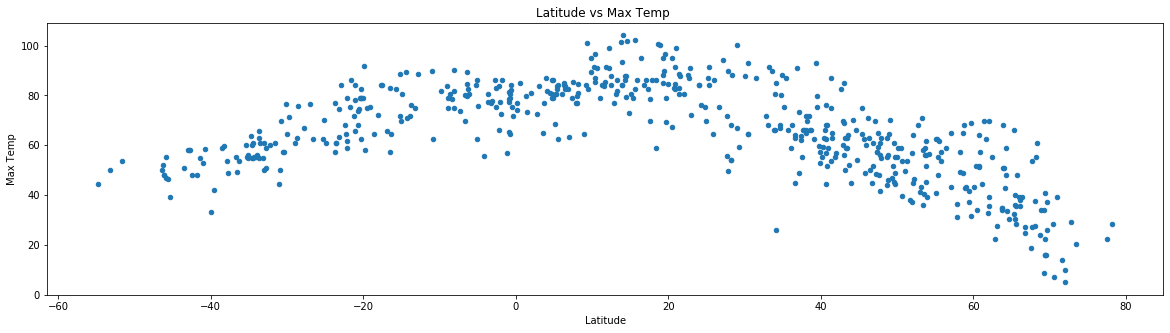

<Figure size 432x288 with 0 Axes>

In [12]:
cities_pd_LVT.plot(kind="scatter", x='Lat', y='Max Temp', figsize=(20,5))
# Set a title for the chart
plt.title("Latitude vs Max Temp ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.tight_layout()

#### Latitude vs. Humidity Plot

In [13]:
cities_pd_LVH= cities_pd.iloc[:,[6,5]]
cities_pd_LVH

,Lat,Humidity
0,68.05,72
1,-20.41,74
2,77.48,73
3,40.71,39
4,-33.93,76
...,...,...
543,33.97,32
544,24.01,4
545,49.65,62
546,51.07,93


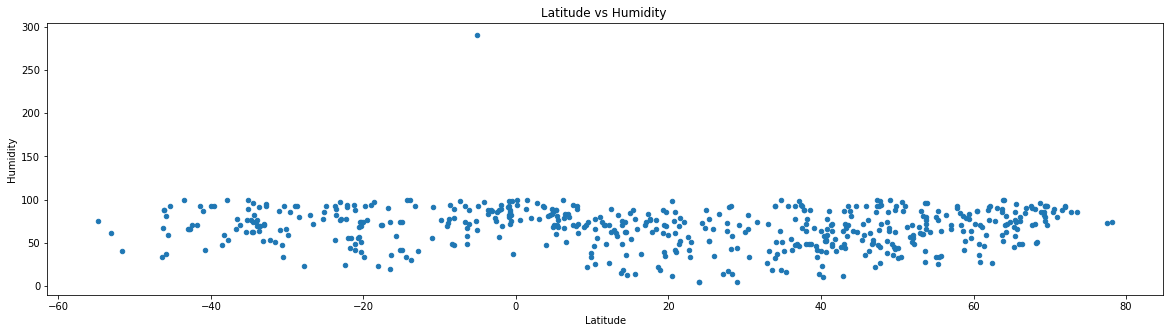

<Figure size 432x288 with 0 Axes>

In [16]:
cities_pd_LVH.plot(kind="scatter", x='Lat', y='Humidity', figsize=(20,5))
# Set a title for the chart
plt.title("Latitude vs Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.tight_layout()

#### Latitude vs. Cloudiness Plot

In [15]:
cities_pd_LVC= cities_pd.iloc[:,[6,2]]
cities_pd_LVC

,Lat,Cloudiness
0,68.05,2
1,-20.41,75
2,77.48,25
3,40.71,0
4,-33.93,20
...,...,...
543,33.97,0
544,24.01,5
545,49.65,0
546,51.07,100


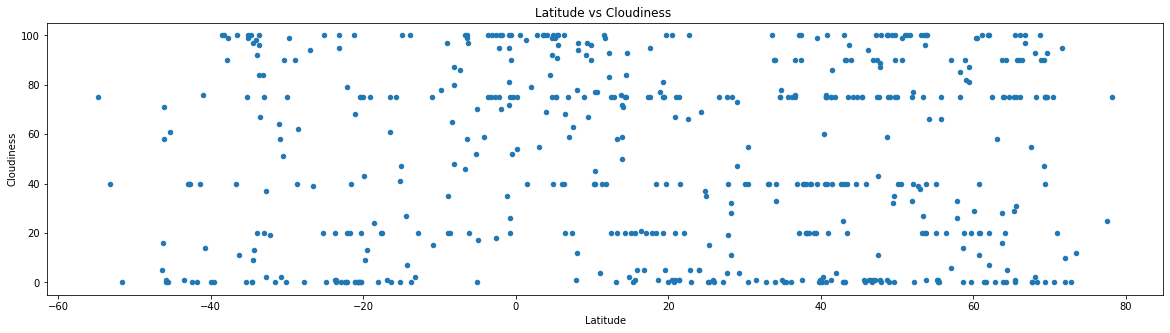

<Figure size 432x288 with 0 Axes>

In [17]:
cities_pd_LVC.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(20,5))
# Set a title for the chart
plt.title("Latitude vs Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.tight_layout()

#### Latitude vs. Wind Speed Plot

In [21]:
cities_pd_LVW= cities_pd.iloc[:,[6,9]]
cities_pd_LVW

,Lat,Wind Speed
0,68.05,7.16
1,-20.41,11.41
2,77.48,2.37
3,40.71,4.47
4,-33.93,8.05
...,...,...
543,33.97,8.05
544,24.01,16.11
545,49.65,8.05
546,51.07,2.68


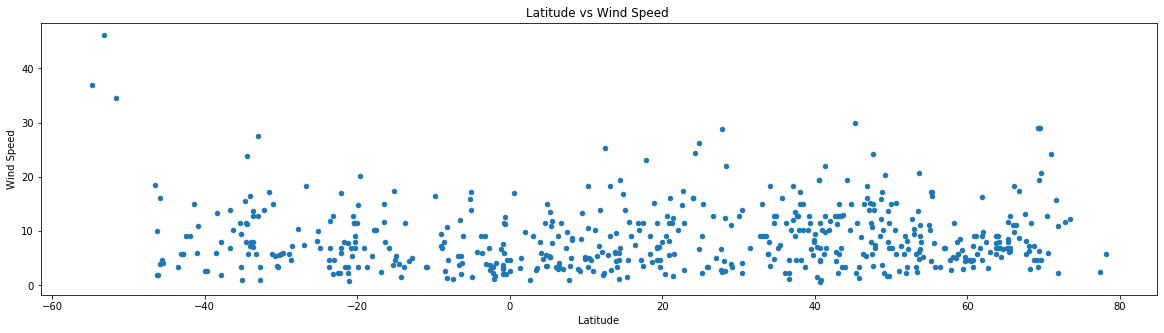

<Figure size 432x288 with 0 Axes>

In [23]:
cities_pd_LVW.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(20,5))
# Set a title for the chart
plt.title("Latitude vs Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.tight_layout()

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots
cities_pd.sort_values('Lat')

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
17,17,ushuaia,75,AR,1558378606,75,-54.81,-68.31,44.60,36.91
27,27,punta arenas,40,CL,1558378759,61,-53.16,-70.91,50.00,46.08
202,202,rio gallegos,0,AR,1558378754,40,-51.62,-69.22,53.60,34.45
51,51,mar del plata,5,AR,1558378763,33,-46.43,-67.52,50.10,18.52
185,185,kaitangata,16,NZ,1558378789,67,-46.28,169.85,52.00,10.00
...,...,...,...,...,...,...,...,...,...,...
55,55,khatanga,10,RU,1558378764,92,71.98,102.47,9.96,10.94
309,309,upernavik,0,GL,1558378846,85,72.79,-56.15,29.22,11.59
66,66,dikson,12,RU,1558378766,85,73.51,80.55,20.22,12.15
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37


In [41]:
# Create Northern and Southern Hemisphere DataFrames
cities_pd_North= cities_pd.sort_values('Lat').head(168)
cities_pd_South= cities_pd.sort_values('Lat').tail(380)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [100]:
cities_pd_NLVT= cities_pd_North.iloc[:,[6,8]]
cities_pd_NLVT

,Lat,Max Temp
17,-54.81,44.60
27,-53.16,50.00
202,-51.62,53.60
51,-46.43,50.10
185,-46.28,52.00
...,...,...
257,-0.72,80.60
305,-0.61,82.14
193,-0.60,84.12
478,-0.50,75.30


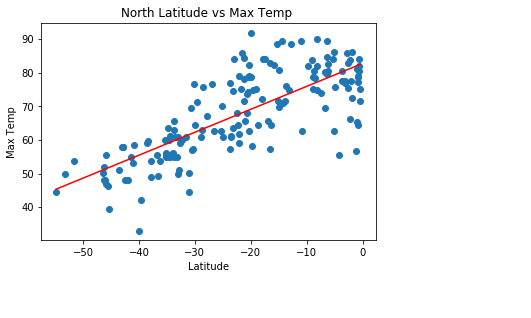

<Figure size 432x288 with 0 Axes>

In [101]:
x_values= cities_pd_NLVT['Lat']
y_values= cities_pd_NLVT['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("North Latitude vs Max Temp ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [102]:
cities_pd_SLVT= cities_pd_South.iloc[:,[6,8]]
cities_pd_SLVT

,Lat,Max Temp
222,0.12,77.00
59,0.12,74.22
113,0.53,85.02
431,1.33,79.62
159,1.49,73.40
...,...,...
55,71.98,9.96
309,72.79,29.22
66,73.51,20.22
2,77.48,22.20


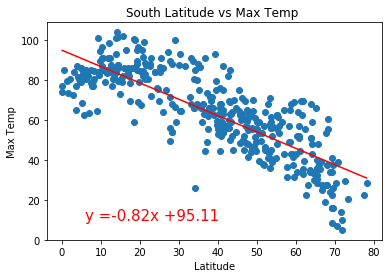

<Figure size 432x288 with 0 Axes>

In [103]:
x_values= cities_pd_SLVT['Lat']
y_values= cities_pd_SLVT['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("South Latitude vs Max Temp ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [104]:
cities_pd_NLVT= cities_pd_North.iloc[:,[6,5]]
cities_pd_NLVT

,Lat,Humidity
17,-54.81,75
27,-53.16,61
202,-51.62,40
51,-46.43,33
185,-46.28,67
...,...,...
257,-0.72,88
305,-0.61,82
193,-0.60,75
478,-0.50,98


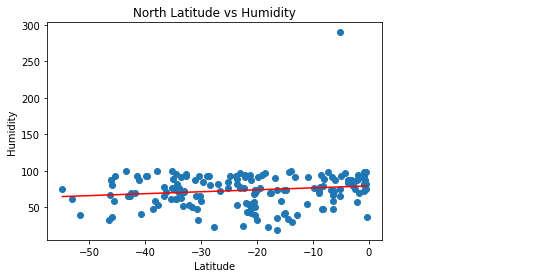

<Figure size 432x288 with 0 Axes>

In [105]:
x_values= cities_pd_NLVT['Lat']
y_values= cities_pd_NLVT['Humidity']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("North Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [106]:
cities_pd_SLVT= cities_pd_South.iloc[:,[6,5]]
cities_pd_SLVT

,Lat,Humidity
222,0.12,94
59,0.12,99
113,0.53,76
431,1.33,89
159,1.49,100
...,...,...
55,71.98,92
309,72.79,85
66,73.51,85
2,77.48,73


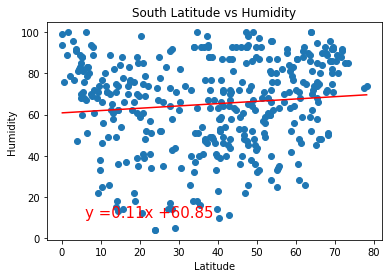

<Figure size 432x288 with 0 Axes>

In [107]:
x_values= cities_pd_SLVT['Lat']
y_values= cities_pd_SLVT['Humidity']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("South Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [108]:
cities_pd_NLVT= cities_pd_North.iloc[:,[6,2]]
cities_pd_NLVT

,Lat,Cloudiness
17,-54.81,75
27,-53.16,40
202,-51.62,0
51,-46.43,5
185,-46.28,16
...,...,...
257,-0.72,20
305,-0.61,90
193,-0.60,100
478,-0.50,52


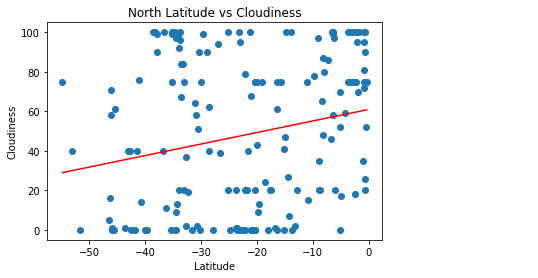

<Figure size 432x288 with 0 Axes>

In [109]:
x_values= cities_pd_NLVT['Lat']
y_values= cities_pd_NLVT['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("North Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [110]:
cities_pd_SLVT= cities_pd_South.iloc[:,[6,2]]
cities_pd_SLVT

,Lat,Cloudiness
222,0.12,75
59,0.12,54
113,0.53,100
431,1.33,98
159,1.49,40
...,...,...
55,71.98,10
309,72.79,0
66,73.51,12
2,77.48,25


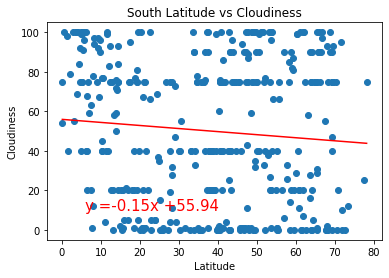

<Figure size 432x288 with 0 Axes>

In [111]:
x_values= cities_pd_SLVT['Lat']
y_values= cities_pd_SLVT['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("South Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [112]:
cities_pd_NLVT= cities_pd_North.iloc[:,[6,9]]
cities_pd_NLVT

,Lat,Wind Speed
17,-54.81,36.91
27,-53.16,46.08
202,-51.62,34.45
51,-46.43,18.52
185,-46.28,10.00
...,...,...
257,-0.72,11.41
305,-0.61,12.57
193,-0.60,11.30
478,-0.50,2.08


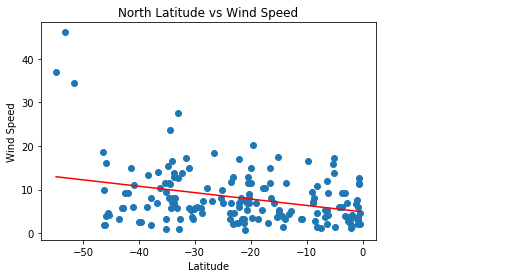

<Figure size 432x288 with 0 Axes>

In [113]:
x_values= cities_pd_NLVT['Lat']
y_values= cities_pd_NLVT['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("North Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [114]:
cities_pd_SLVT= cities_pd_South.iloc[:,[6,9]]
cities_pd_SLVT

,Lat,Wind Speed
222,0.12,4.70
59,0.12,2.62
113,0.53,17.00
431,1.33,3.22
159,1.49,4.97
...,...,...
55,71.98,10.94
309,72.79,11.59
66,73.51,12.15
2,77.48,2.37


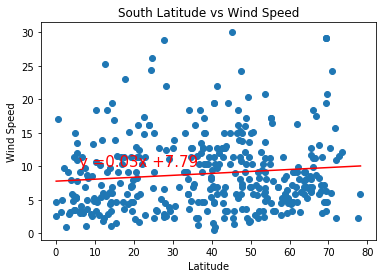

<Figure size 432x288 with 0 Axes>

In [115]:
x_values= cities_pd_SLVT['Lat']
y_values= cities_pd_SLVT['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values= x_values *slope +intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10) , fontsize=15, color="red")
plt.title("South Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.tight_layout()